Need to read Metadata (xml files)
* https://docs.python.org/2/library/xml.etree.elementtree.html
* https://www.datacamp.com/community/tutorials/python-xml-elementtree

Need to read dcm files or .nii files: 
* https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/
* https://medium.com/coinmonks/visualizing-brain-imaging-data-fmri-with-python-e1d0358d9dba
* https://www.raddq.com/dicom-processing-segmentation-visualization-in-python/

* https://nilearn.github.io/introduction.html#what-is-nilearn-mvpa-decoding-predictive-models-functional-connectivity
* http://nipy.org/nibabel/nibabel_images.html

Similar Kaggle competitions:
* https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/kernels
* https://www.kaggle.com/c/data-science-bowl-2017/discussion/28034
* https://www.kaggle.com/ashishpatel26/chexnet-radiologist-level-pneumonia-detection
* https://github.com/booz-allen-hamilton/DSB3Tutorial

In [77]:
import numpy as np
import pandas as pd
import ntpath
import os
import matplotlib.pyplot as plt
% matplotlib inline

In [74]:
def reading_csv_files(folder_path):
    # saving all the csv files in a dataframe
    import os
    import glob
    # glob.glob('*.csv') #find all the csv files in a pathname. 
    os.chdir(folder_path)
    csv_files = [i for i in glob.glob('*.csv')]

    # Reading each csv file and storing them in a dictionnary containing the file name and the dataframe
    dict_files={}
    files_names=[]
    for files in csv_files:
    #for i, files in enumerate(csv_files): 
        df=pd.read_csv(files,engine='python')
        basepath, filename=ntpath.split(files)
        files_names.append(filename)
        dict_files[filename]=df

    # Calculating the # of rows and features for each dataframe and storing them in a list of tuples
    shape_df=[]
    for i in range(0,len(dict_files.keys())):
        nrows, ncols=(len(dict_files[files_names[i]]),len(dict_files[files_names[i]].columns))
        shape_df.append((nrows,ncols))

    return (shape_df,files_names,dict_files)

In [2]:
path_metadata_csv='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/pop_all_-_FMRI_9_03_2018.csv'

In [75]:
df_metadata_csv=pd.read_csv(path_metadata_csv)
df_metadata_csv.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,482357,85242,Prodromal,M,64,1,fMRI,ep2d_bold_rest,Original,2/18/2015,DCM,9/03/2018
1,497281,85236,Prodromal,M,67,90,fMRI,ep2d_bold_rest,Original,4/15/2015,DCM,9/03/2018
2,467053,60075,Prodromal,M,66,1,fMRI,ep2d_RESTING_STATE,Original,11/11/2014,DCM,9/03/2018
3,449726,60074,Prodromal,M,74,0,fMRI,ep2d_RESTING_STATE,Original,9/30/2014,DCM,9/03/2018
4,440323,60073,Prodromal,M,65,0,fMRI,ep2d_RESTING_STATE,Original,7/31/2014,DCM,9/03/2018


In [9]:
len(df_metadata_csv)
file_list=list(df_metadata_csv['Subject'])

In [85]:
folder_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/data/PPMI-final-dataset-382018/4-Imaging/'
files_names=reading_csv_files(folder_path)[1]
dict_files=reading_csv_files(folder_path)[2]
MRIINFO=dict_files[files_names[10]]
print(len(MRIINFO))
print(len(np.unique(MRIINFO['study_subject_id'])))
#MRIINFO.head(100)

1342
811


In [79]:
#!cd '/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI
#!ls > listOfFolders.txt

`path_listOffolders='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/listOfFolders.txt'


appendText="'"
folders=open(path_listOffolders,'r')
updatedFolders=open('/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/updatedfolders.txt','a')
for name in folders:
    updatedFolders.write(appendText + name.rstrip() + appendText + '\n')
updatedFolders.close()

path_updatedFolders='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/updatedfolders.txt'
with open(path_updatedFolders, 'r') as f:
    file_lines = [''.join([x.strip(), ',', '\n']) for x in f.readlines()]

with open(path_updatedFolders, 'w') as f:
    f.writelines(file_lines)`

In [32]:
foldersPPMI=['00705MAR14','00706FEB13','00706MAY15','00707MAY14','00708MAY15','00710JUL13','00711MAR15',
             '00712MAR14','00713NOV13','00714NOV12','00715MAY13','00716JUL14','00716NOV12','00717APR13',
             '00717JUL13','00718APR13','00718SEP13','00719FEB14','00719JUN13','00719JUN14','00719SEP13',
             '00720AUG14','00720FEB13','00721MAY14','00722APR13','00722MAY13','00723JAN13','00723JUL14',
             '00724APR13','00726MAR14','00728APR15','00728MAY14','00729MAY13','00730MAR15','00730OCT14',
             '02325SEP14','02818APR13','02818MAY15','02820DEC13','02823APR13','02829NOV12','028phant',
             '03201AUG13','03201FEB13','03201JUN15','03202OCT14','03203JUL13','03204JUN14','03204NOV15',
             '03205JUL13','03205JUN14','03206APR15','03206AUG14','03206DEC12','03206MAY15','03208JAN15',
             '03209OCT13','03210JAN13','03210MAR14','03211MAY15','03211SEP13','03212AUG15','03212MAR14',
             '03212MAY15','03212NOV12','03212SEP13','03213AUG14','03213FEB15','03213MAR13','03214AUG13',
             '03214MAY15','03215AUG13','03216APR14','03218NOV13','03219AUG15','03219FEB14','03219JUN13',
             '03219MAY14','03220DEC12','03220FEB14','03221AUG13','03221FEB13','03222JAN14','03223JUL15',
             '03225JUN13','03227FEB13','03227FEB14','03228MAR13','03228MAY13','03229APR13','03229APR15',
             '03229JUL13','03230APR15','03230JUL14','03231JAN13','03231JUL13','032phant','08801APR15',
             '08803APR14','08803JUN14','08803MAR14','08806AUG14','08807JAN13','08807OCT14','08808JUL14',
             '08808MAR13','08810MAR14','08811MAR13','08811MAR15','08812AUG14','08812JAN15','08812MAR14',
             '08812MAR15','08814JAN13','08814MAR14','08814MAY14','08815APR13','08817DEC14','08817MAR14',
             '08817MAR15','08817SEP14','08818AUG14','08818MAR15','08818SEP15','08819MAR14','08819NOV14',
             '08820AUG15','08822APR15','08822OCT15','08823APR14','08824FEB15','08824SEP14','08825FEB14',
             '08825JAN13','08827AUG14','08827MAR13','08829JUN15','08829SEP15','08830MAR15','08830OCT13',
             '08831OCT12','12001APR13','12001DEC14','12002APR13','12002JUN15','12003JAN13','12008APR15',
             '12010MAR14','12011AUG15','12013FEB14','12013MAY14','12017DEC14','12020FEB13','12020JAN15',
             '12021APR14','12023APR15','12024APR14','12030OCT14','16644','28905NOV14','28909JUL14',
             '28911DEC13','28913MAR13','28915APR14','28916APR14','28919NOV14','28923JUL14','28928JAN15',
             '28930SEP15','29001JUL14','29002JUN15','29003FEB15','29006MAY14','29006OCT15','29007OCT14',
             '29009DEC14','29009SEP14','29010FEB15','29010JUN14','29011NOV14','29012AUG14','29013JAN15',
             '29013MAY14','29015SEP15','29017JUN14','29018NOV14','29019MAY15','29020MAY14','29021APR15',
             '29022JUL14','29024MAR15','29025AUG15','29025MAR14','29025NOV14','29026AUG14','29027OCT15',
             '29028JUL15','29028MAY13','29029APR14','29030SEP14','29031JUL14','29031MAR15','29108APR14',
             '3101','3105','3106','3107','3108','3118','3119','3123','3124','3125','3126','3128','3131',
             '3132','3134','3350','3351','3352','3353','3354','3357','3359','3360','3361','3364','3367',
             '3369','3373','3374','3377','3380','3384','3387','3392','3551','3552','3556','3557','3559',
             '3563','3565','3566','3567','3569','3574','3575','3581','3582','3585','3586','3587','3591',
             '3592','3593','3760','3771','3800','3802','3808','3814','3815','3818','3819','3820','3822',
             '3823','3824','3825','3826','3828','3829','3830','3831','3832','3834','3835','3836','3838',
             '3863','3869','3870','3871','4005','4011','4013','4018','4019','4021','4022','4029','4030',
             '4032','40338','4034','4035','40360','40366','4038','40451','50110','50143','50172','50222',
             '50225','50901','51302','51392','60023','60024','60033','60035','60036','60040','60041','60043',
             '60044','60070','60073','60074','60075','85236','85242']

In [22]:
mask=df_metadata_csv['Subject'].isin(foldersPPMI)
mask.head()

0    True
1    True
2    True
3    True
4    True
Name: Subject, dtype: bool

In [29]:
missing_index=df_metadata_csv[df_metadata_csv['Subject'].isin(foldersPPMI)==False].index
missing_subject=df_metadata_csv.loc[df_metadata_csv['Subject'].isin(foldersPPMI)==False,'Subject']
list_missing_subject=list(missing_subject.values)

### Test on Patient # 3351 folder

In [37]:
path_test='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/3351/ep2d_RESTING_STATE/2015-06-01_08_19_43.0/S271109'

210
(462, 476, 210) (3.2941176891327, 3.2941176891327, 3.2999999523163)
(462, 476)
((462, 476), (462, 476))


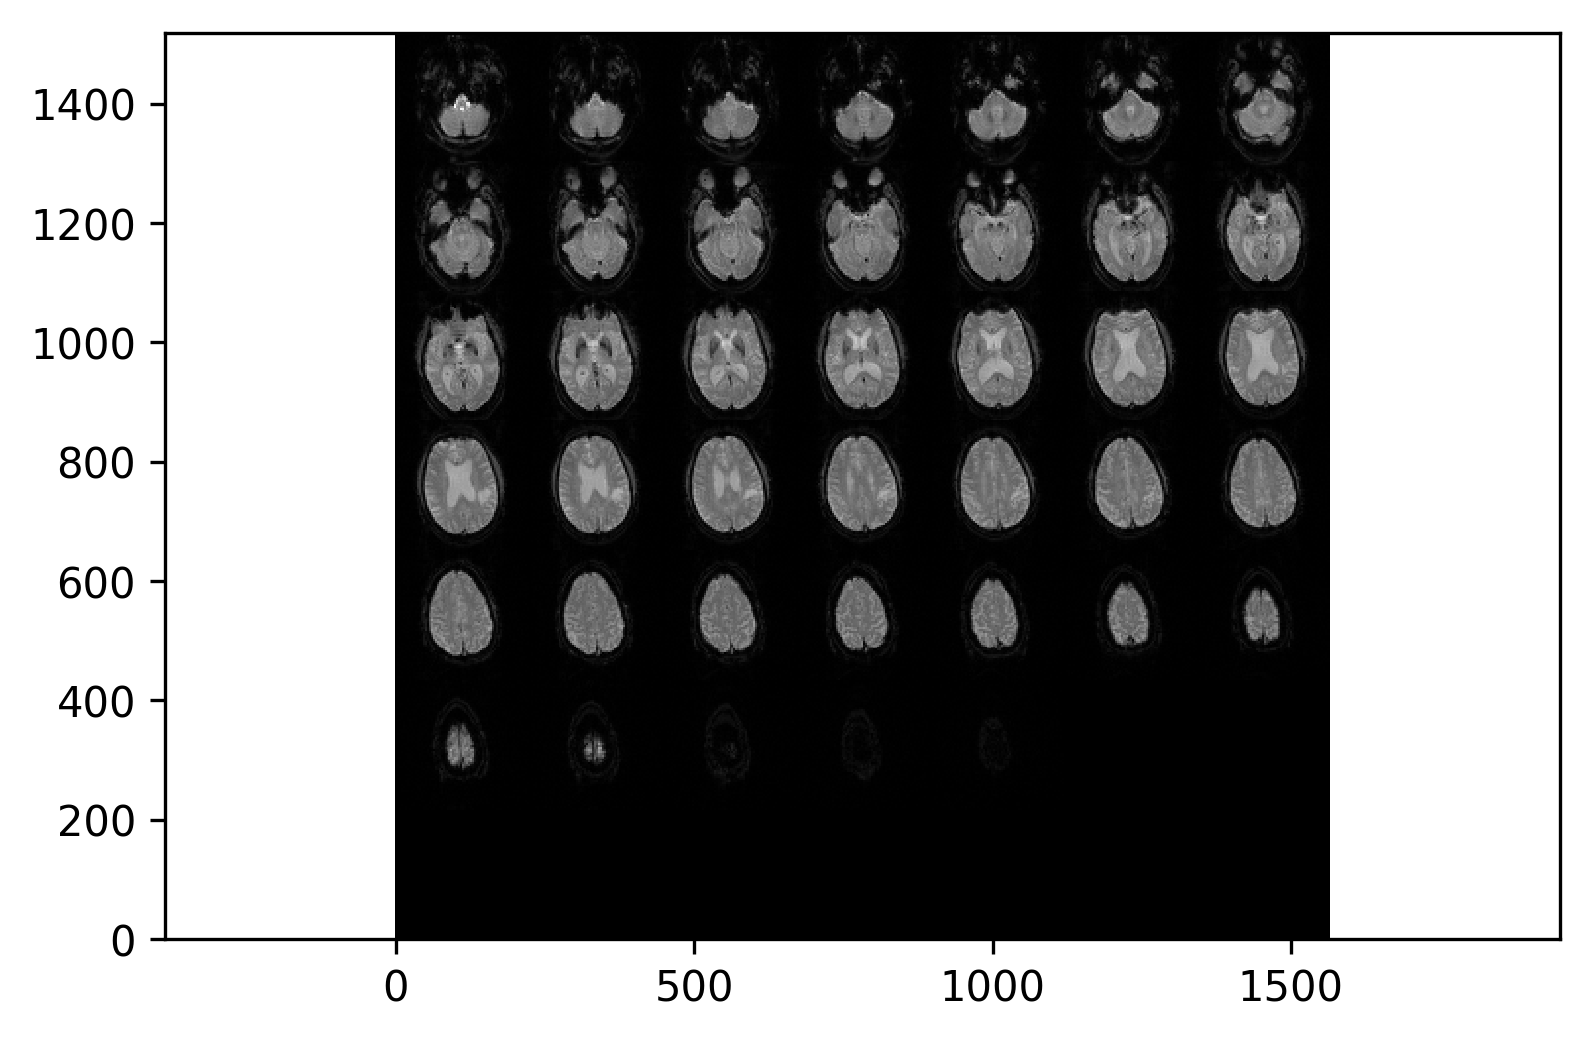

In [71]:
PathDicom =path_test
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
print(len(lstFilesDCM))

# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

print(ConstPixelDims, ConstPixelSpacing)

x = np.arange(0.0, (ConstPixelDims[0])*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1])*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2])*ConstPixelSpacing[2], ConstPixelSpacing[2])

# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 80])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)

In [72]:
#help(os.walk)